# **Laporan Praktikum Genetic Algorithm**

Nama  : Alif As'ad Ramadhan

NRP   : 5054231007 

# **Pendahuluan**

Travelling Salesman Problem (TSP) adalah salah satu masalah optimasi kombinatorial yang dikenal sebagai NP-hard. Tujuannya adalah mencari rute terpendek untuk mengunjungi sejumlah kota dan kembali ke kota asal, dengan setiap kota dikunjungi sekali saja.

Genetic Algorithm (GA) adalah salah satu metode komputasi evolusioner yang digunakan untuk menyelesaikan TSP secara iteratif melalui Fitness calculation, Parent selection, crossover, dan mutasi.


# **Proses Genetic Algorithm**

### **1. Fitness Calculation**

Fungsi fitness mengevaluasi kualitas setiap rute berdasarkan jarak total. Rute dengan jarak yang lebih pendek memiliki nilai fitness lebih tinggi. Rumus fitness dinyatakan sebagai:
​


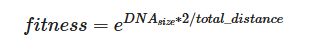

**Contoh:**

- **Populasi awal**: `[[0, 2, 1, 3], [1, 3, 0, 2], [2, 0, 3, 1]]`
- **Posisi kota**: `[[0, 0], [1, 2], [2, 0], [3, 3]]`
- **Jarak total**: `[7.211, 8.485, 7.616]`
- **Fitness**: `[0.00365, 0.00274, 0.0039]`


### **2. Parent Selection**

`Parent selection` dilakukan menggunakan metode *roulette wheel sampling*, di mana individu dengan nilai fitness lebih tinggi memiliki peluang lebih besar untuk dipilih.

### **3. Crossover**

Pada tahap ini, subset gen dari satu parent dikombinasikan dengan gen dari orang tua lain untuk menghasilkan keturunan, tanpa mengulang kota.

**Contoh:**

- **Parent 1**: `[0, 2, 1, 3]`
- **Parent 2**: `[2, 0, 3, 1]`
- **Random Mask**: `[True, False, True, False]`
- **Offspring**: `[2, 3, 0, 1]`

### **4. Mutation**

Mutasi dilakukan dengan menukar posisi dua kota dalam rute untuk meningkatkan keragaman populasi.

- **Before Mutation**: `[2, 3, 0, 1]`
- **After Mutation**: `[2, 1, 0, 3]`

## **Hasil Evolusi**

contoh implementasi pada `github`

- **N_CITIES**: 20
- **CROSS_RATE**: 0.1
- **MUTATE_RATE**: 0.02
- **POP_SIZE**: 500
- **N_GENERATIONS**: 350

Proses evolusi dilakukan melalui generasi dengan seleksi parent, crossover, dan mutasi. Dalam contoh implementasi, parameter yang digunakan adalah:

- **N_CITIES**: 15
- **CROSS_RATE**: 0.3
- **MUTATE_RATE**: 0.01
- **POP_SIZE**: 300
- **N_GENERATIONS**: 150

Solusi terbaik menunjukkan jarak yang lebih pendek setelah evolusi bertahap.

## **Alasan pemilihan nilai parameter**

#### **1. N_CITIES = 15**

- Alasan:
    
    - Mengurangi jumlah kota dari 20 menjadi 15 untuk mempercepat eksperimen.

    - Tetap mempertahankan kompleksitas yang cukup untuk menguji performa algoritma dalam skala sedang.
 
#### **2. CROSS_RATE = 0.3**

- Alasan:

    - Tingkat crossover moderat (30%) menjaga keseimbangan antara eksplorasi (variasi solusi) dan eksploitasi (menggunakan solusi terbaik).

    - Menghindari perubahan solusi yang terlalu agresif sehingga memungkinkan stabilitas dalam konvergensi.

#### **3. MUTATE_RATE = 0.01**

- Alasan:
    
    - Tingkat mutasi rendah (1%) mengurangi kemungkinan gangguan besar pada individu terbaik, mempertahankan kualitas solusi.

    - Cocok untuk masalah berskala kecil-menengah dengan kebutuhan stabilitas yang lebih tinggi.

#### **4. POP_SIZE = 300**

- Alasan:

    - Populasi yang lebih kecil dibandingkan default (500) mengurangi waktu komputasi tanpa mengorbankan keanekaragaman individu secara signifikan.
    
    - Efektif untuk mempercepat iterasi pada eksperimen skala menengah.

#### **5. N_GENERATIONS = 150**

- Alasan:

    - Jumlah generasi lebih rendah dibandingkan 350 untuk menghemat waktu proses, cukup untuk mencapai konvergensi pada eksperimen ini.

    - Diharapkan solusi optimal tercapai lebih cepat dengan kombinasi parameter lainnya.

# **Kode Implementasi**

Berikut adalah kode lengkap untuk Genetic Algorithm dalam menyelesaikan TSP:

In [13]:
import matplotlib.pyplot as plt
import numpy as np

N_CITIES = 15
CROSS_RATE = 0.3
MUTATE_RATE = 0.01
POP_SIZE = 300
N_GENERATIONS = 150

class GA(object):
    def __init__(self, DNA_size, cross_rate, mutation_rate, pop_size):
        self.DNA_size = DNA_size
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size

        self.pop = np.vstack([np.random.permutation(DNA_size) for _ in range(pop_size)])

    def translateDNA(self, DNA, city_position):     # get cities' coord in order
        line_x = np.empty_like(DNA, dtype=np.float64)
        line_y = np.empty_like(DNA, dtype=np.float64)
        for i, d in enumerate(DNA):
            city_coord = city_position[d]
            line_x[i, :] = city_coord[:, 0]
            line_y[i, :] = city_coord[:, 1]
        return line_x, line_y

    def get_fitness(self, line_x, line_y):
        total_distance = np.empty((line_x.shape[0],), dtype=np.float64)
        for i, (xs, ys) in enumerate(zip(line_x, line_y)):
            total_distance[i] = np.sum(np.sqrt(np.square(np.diff(xs)) + np.square(np.diff(ys))))
        fitness = np.exp(self.DNA_size * 2 / total_distance)
        return fitness, total_distance

    def select(self, fitness):
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness / fitness.sum())
        return self.pop[idx]

    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool_)    # choose crossover points
            keep_city = parent[~cross_points]                                       # find the city number
            swap_city = pop[i_, np.isin(pop[i_].ravel(), keep_city, invert=True)]
            parent[:] = np.concatenate((keep_city, swap_city))
        return parent

    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                swap_point = np.random.randint(0, self.DNA_size)
                swapA, swapB = child[point], child[swap_point]
                child[point], child[swap_point] = swapB, swapA
        return child

    def evolve(self, fitness):
        pop = self.select(fitness)
        pop_copy = pop.copy()
        for parent in pop:  # for every parent
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop

class TravelSalesPerson(object):
    def __init__(self, n_cities):
        self.city_position = np.random.rand(n_cities, 2)
        plt.ion()
        self.iter = 0

    def plotting(self, lx, ly, total_d, save=False):
        plt.cla()
        plt.scatter(self.city_position[:, 0].T, self.city_position[:, 1].T, s=100, c='k')
        plt.plot(lx.T, ly.T, 'r-')
        plt.text(-0.05, -0.05, "Total distance=%.2f" % total_d, fontdict={'size': 20, 'color': 'red'})
        plt.xlim((-0.1, 1.1))
        plt.ylim((-0.1, 1.1))
        if save: plt.savefig('Images/travelling_salesman/travelling_salesman_{:03d}'.format(self.iter))
        if self.iter%50==0: plt.show()
        self.iter += 1

In [14]:
env = TravelSalesPerson(N_CITIES)

Gen: 0 | best fit: 264.29


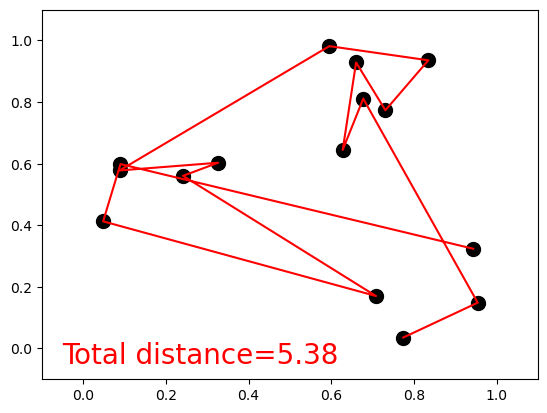

Gen: 50 | best fit: 20792.32


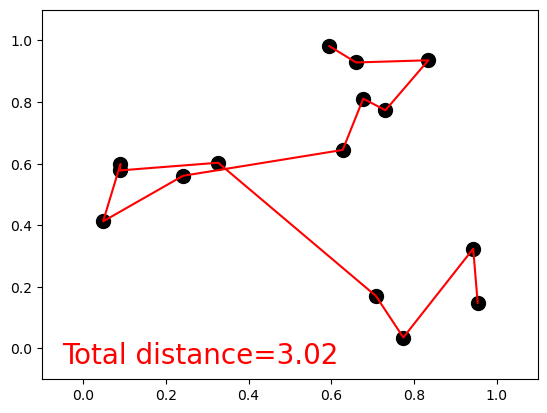

Gen: 100 | best fit: 73308.90


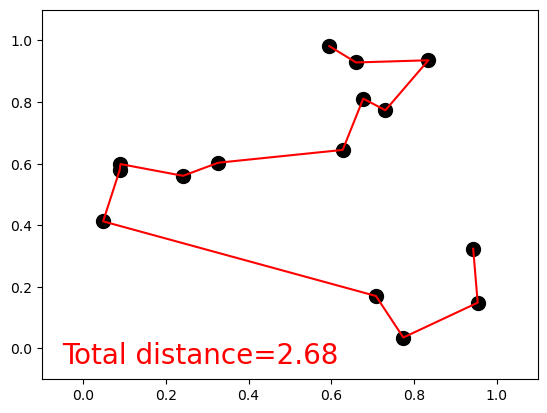

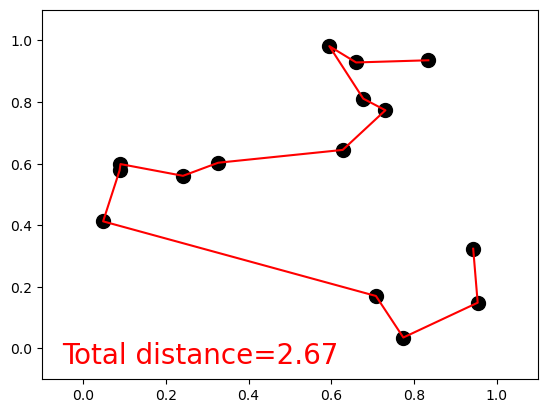

In [15]:
np.random.seed(99)

n_runs = 20
fitness_max = np.zeros((n_runs, N_GENERATIONS))
for i in range(n_runs):
    ga = GA(DNA_size=N_CITIES, cross_rate=CROSS_RATE, mutation_rate=MUTATE_RATE, pop_size=POP_SIZE)
    for generation in range(N_GENERATIONS):
        lx, ly = ga.translateDNA(ga.pop, env.city_position)
        fitness, total_distance = ga.get_fitness(lx, ly)
        ga.evolve(fitness)
        best_idx = np.argmax(fitness)
        fitness_max[i, generation] = total_distance[best_idx]
        if i==0:
            if generation%50==0: print('Gen:', generation, '| best fit: %.2f' % fitness[best_idx],)
            env.plotting(lx[best_idx], ly[best_idx], total_distance[best_idx])

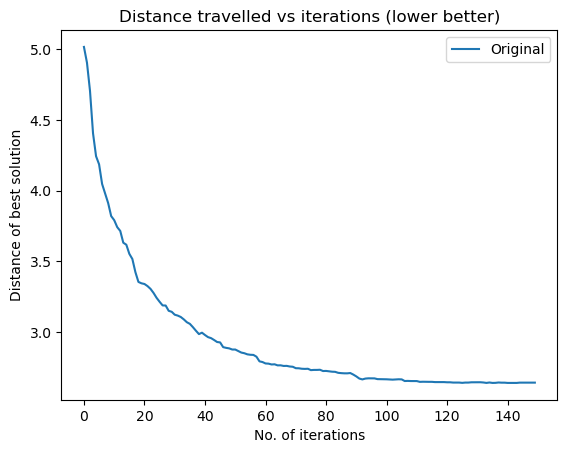

In [16]:
plt.plot(np.average(fitness_max, axis=0), label='Original')
plt.title('Distance travelled vs iterations (lower better)')
plt.xlabel('No. of iterations')
plt.ylabel('Distance of best solution')
plt.legend()

## **Kesimpulan**

- Gambar menunjukkan proses optimasi algoritma genetika dari rute awal yang acak hingga rute yang lebih optimal setelah evolusi.

- Algoritma ini secara bertahap memperbaiki solusi dengan mekanisme seleksi, crossover, dan mutasi, yang terlihat dari pengurangan jarak total dan peningkatan nilai fitness.

# **Terimakasih**